# Primera preentrega

- Nombre: Michael Meneses
- Comisión: 61605
- Dataset: Telco Customer Churn

## Introducción ✨
El siguiente análisis se centra en el análisis del comportamiento de clientes de telecomunicaciones propensos a realizar algún cambio de compañía en cualquiera de los distintos productos que posee. Para comprender estos comportamientos aplicaré EDA para posteriormente, en una segunda etapa, llevar los datos procesados y preparados a un análisis predictivo.

El objetivo final del análisis es adelantarse al propenso cambio de compañía y buscar formas de retenerlo. De esta manera, podriamos conseguir reducir las perdidas de ingresos debida a la fuga de clientes.

El dataset se compone de información de clientes que han dado de baja algún producto en el último mes, servicios contratados dentro de la compañía por cada cliente, información sobre la existencia del cliente dentro de la compañía e información demográfica de cada uno de ellos. Contiene 21 columnas y 7043 registros.

- **customerID:** Es un dato categórico que indica un ID único por cliente
- **gender:** Es un dato categórico que indica el género del cliente. Dicho valor puede ser "male" o "female"
- **SeniorCitizen:** Es un dato numérico que indica si el cliente es una persona mayor. Dicho valor será 1 (true) o 0 (false)
- **Partner:** Es un dato categórico que indica si el cliente tiene pareja. Dicho valor será "Yes" o "No"
- **Dependents:** Es un dato categórico que indica si el cliente tiene personas a cargo. Dicho valor será "Yes" o "No"
- **tenure:** Es un dato numérico que indica la cantidad de meses que el cliente tiene dentro de la compañía
- **PhoneService:** Es un dato categórico que indica si el cliente tiene servicio telefónico contratado. Dicho valor será "Yes" o "No"
- **MultipleLines:** Es un dato categórico que indica si el cliente tiene múltiples líneas. Dicho valor será "Yes", "No" o "No phone service"
- **InternetService:** Es un dato categórico que indica el tipo de servicio de internet contratado por el cliente. Dicho valor será "DSL", "Fiber optic" o "No"
- **OnlineSecurity:** Es un dato categórico que indica si el cliente tiene contratado el producto "Online Security". Dicho valor será "Yes", "No" o "No internet service"
- **OnlineBackup:** Es un dato categórico que indica si el cliente tiene contratado el producto "Online Backup". Dicho valor será "Yes", "No" o "No internet service"
- **DeviceProtection:** Es un dato categórico que indica si el cliente tiene contratado el producto "Device Protection". Dicho valor será "Yes", "No" o "No internet service"
- **TechSupport:** Es un dato categórico que indica si el cliente tiene contratado el producto "Tech Support". Dicho valor será "Yes", "No" o "No internet service"
- **StreamingTV:** Es un dato categórico que indica si el cliente tiene contratado el producto "Streaming TV". Dicho valor será "Yes", "No" o "No internet service"
- **StreamingMovies:** Es un dato categórico que indica si el cliente tiene contratado el producto "Streaming Movies". Dicho valor será "Yes", "No" o "No internet service"
- **Contract:** Es un dato categórico que indica la duración del contrato del cliente. Dicho valor será "Month-to-month", "One year" o "Two year"
- **PaperlessBilling:** Es un dato categórico que indica si el cliente dispone de facturación electrónica. Dicho valor será "Yes" o "No"
- **PaymentMethod:** Es un dato categórico que indica el método de pago del cliente. Dicho valor será "Electronic check", "Mailed check", "Bank transfer (automatic)" o "Credit card (automatic)"
- **MonthlyCharges:** Es un dato numérico que indica el valor de la facturación mensual del cliente.
- **TotalCharges:** Es un dato numérico que indica el monto total que se le ha cobrado al cliente durante su permanencia en la compañía.
- **Churn:** Es un dato categórico que indica si el cliente se ha dado de baja. Dicho valor será "Yes" o "No"

## Importación de librerías 📚

In [418]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.preprocessing import LabelEncoder

## Cargando Dataset ⌛

In [80]:
df = pd.read_csv('__churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Información del dataset 🔡

In [81]:
# registros y columnas del dataset
print("El dataset contiene (registros, columnas): " + str(df.shape))                 # cantidad de registros y columnas
print("\nLa cantidad de duplicados son: " + str(df.duplicated().sum()))              # valores duplicados dentro del dataset
print("\n¿En que columna tengo valores NA? \n" + str(df.isna().sum()))               # valores NA dentro del dataset

El dataset contiene (registros, columnas): (7043, 21)

La cantidad de duplicados son: 0

¿En que columna tengo valores NA? 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [82]:
# Visualizo la información de las columnas y registros del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
# Convierto la columna "SeniorCitizen" en int64 a object
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# Convierto la columna "TotalCharges" de object a float64
df['TotalCharges'].value_counts()
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# df['MonthlyCharges'][(df['TotalCharges'] == ' ')]
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
# Visualizo las estadísticas principales de las variables númericas
df.describe().T.style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.000000,2279.798992,2266.730170,18.800000,398.550000,1394.550000,3786.600000,8684.800000


## EDA 📊

### Visualizar la variable objetivo 🎯

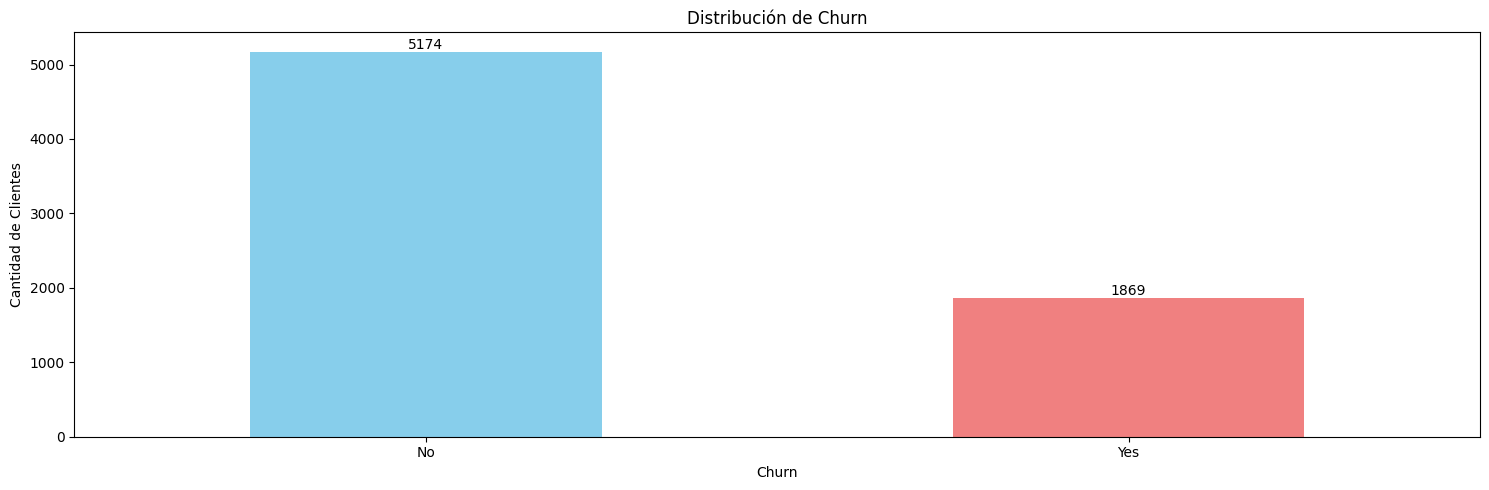

In [276]:
obj = df['Churn'].value_counts()

plt.figure(figsize=(15, 5))
obj.plot(
    kind='bar',
    color=['skyblue', 'lightcoral'],
    title='Distribución de Churn',
    xlabel='Churn',
    ylabel='Cantidad de Clientes')
plt.xticks(rotation = 0)
for index, value in enumerate(obj.values):
    plt.text(index, value, value, ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Visualizar la variable objetivo (Churn) sobre el resto de variables 🆚

#### Versus Tenure (meses de permanencia en la compañia)

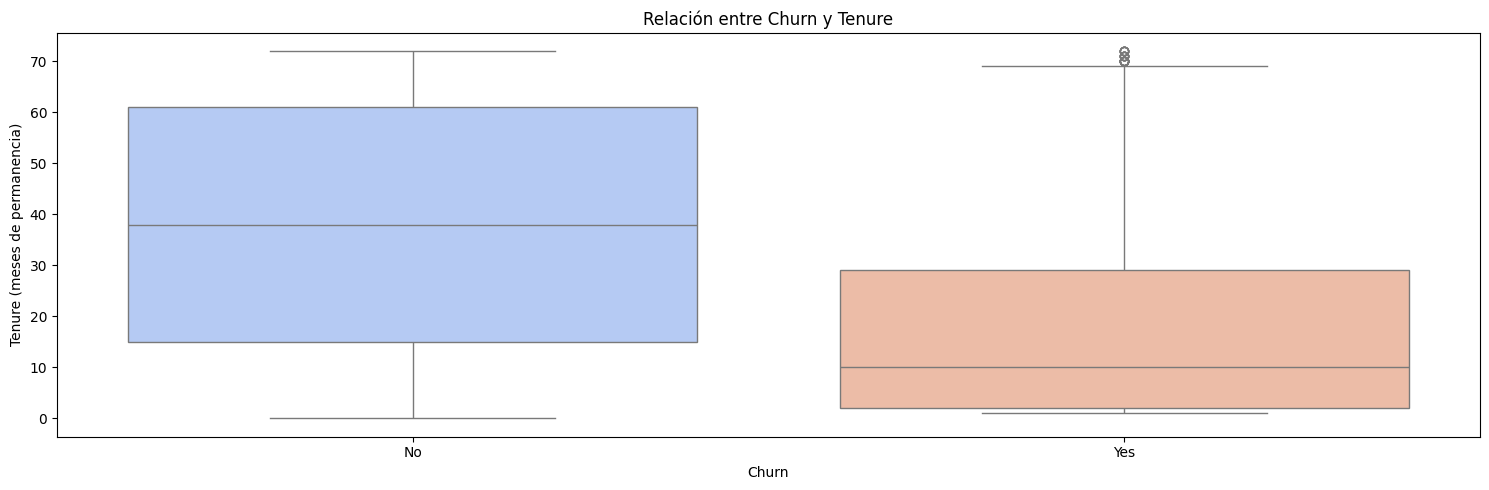

In [277]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette="coolwarm")

plt.title('Relación entre Churn y Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses de permanencia)')

plt.tight_layout()
plt.show()

#### Versus MonthlyCharges y TotalCharges (cargos en boleta mensuales y por el total de vida en la compañía)

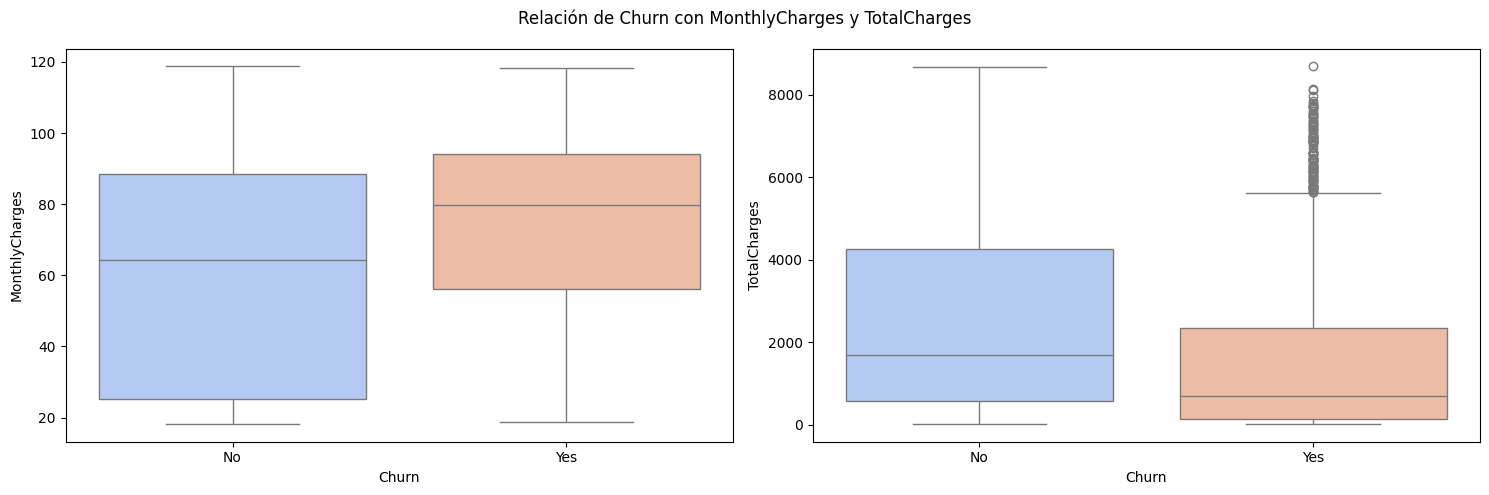

In [298]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Relación de Churn con MonthlyCharges y TotalCharges')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="coolwarm", ax=axs[0])
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette="coolwarm", ax=axs[1])

plt.tight_layout()
plt.show()

#### Versus el resto de variables

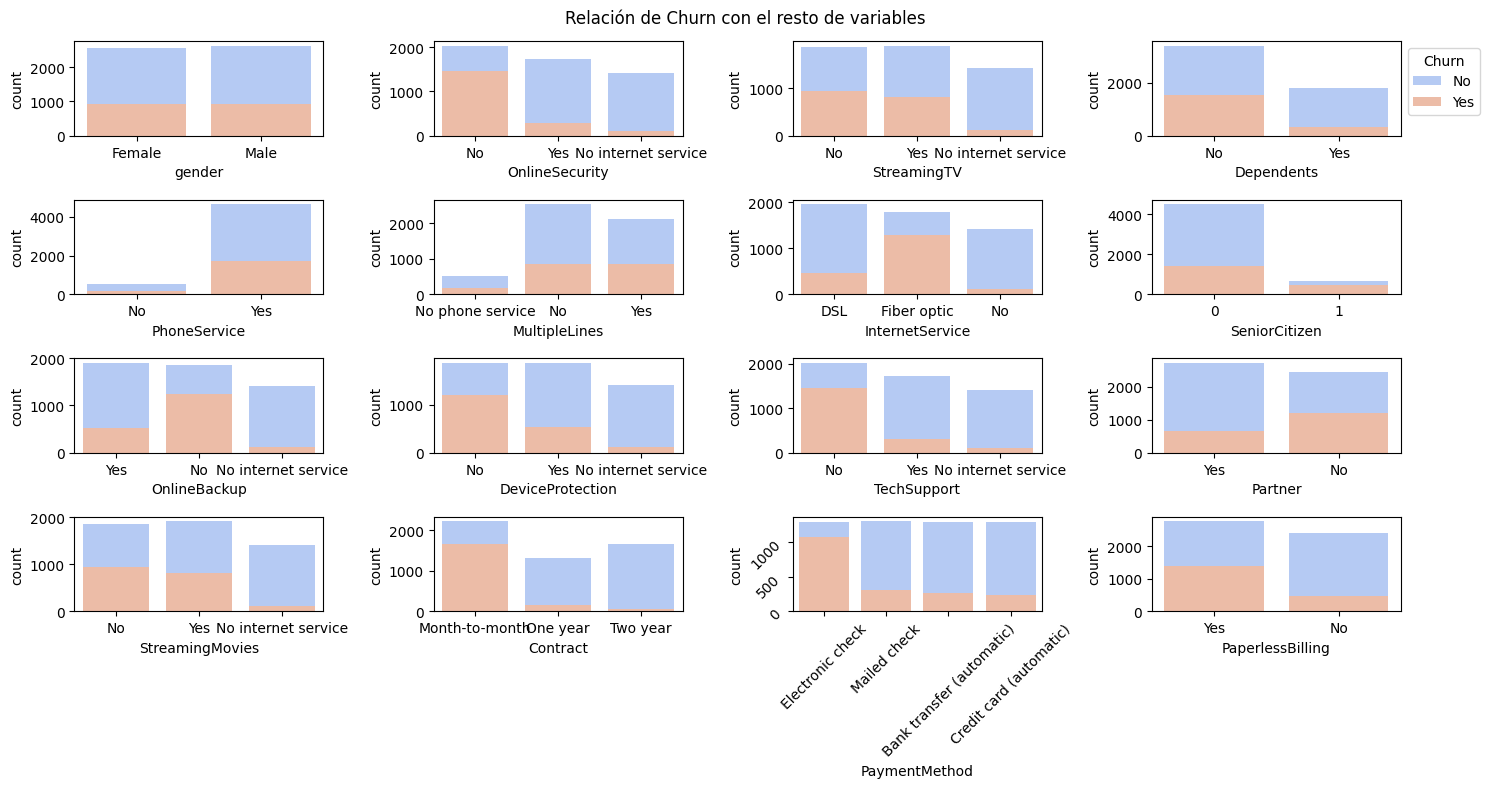

In [431]:
fig, axs = plt.subplots(4, 4, figsize=(15, 8))
fig.suptitle('Relación de Churn con el resto de variables')

sns.countplot(x='gender', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[0,0])
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[0,1])
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[0,2])
sns.countplot(x='Dependents', hue='Churn', data=df, palette="coolwarm", dodge=False, ax=axs[0,3])
sns.move_legend(axs[0,3], 'upper left', bbox_to_anchor=(1,1))

sns.countplot(x='PhoneService', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[1,0])
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[1,1])
sns.countplot(x='InternetService', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[1,2])
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[1,3])

sns.countplot(x='OnlineBackup', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[2,0])
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[2,1])
sns.countplot(x='TechSupport', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[2,2])
sns.countplot(x='Partner', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[2,3])

sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[3,0])
sns.countplot(x='Contract', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[3,1])
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[3,2]).tick_params(rotation=45)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette="coolwarm", dodge=False, legend=False, ax=axs[3,3])

plt.tight_layout()
plt.show()

### Matriz de correlación entre las variables

In [ ]:
# elimino columna "customerID" y codifico con "LabelEncoder" los datos categoricos
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df_corr = df.drop(['customerID'], axis=1)
df_corr[columns] = df_corr[columns].apply(LabelEncoder().fit_transform)
df_corr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


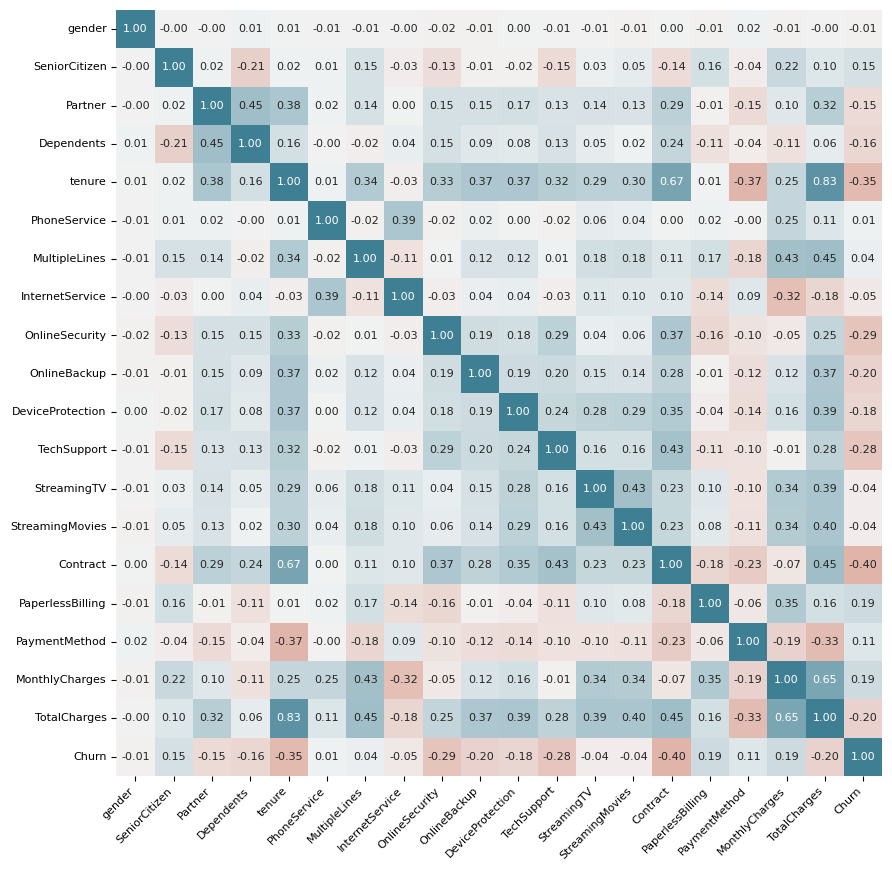

In [353]:
# chequeo de la matriz de correlación
corr_matrix = df_corr.corr(method='pearson')

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cbar=False, annot_kws={"size": 8}, vmin=-1, center=0, vmax=1, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()